# Image analysis (Need and Good)
## Walking in a giant's footsteps


In [2]:
from matplotlib import pyplot as plt
import numpy as np

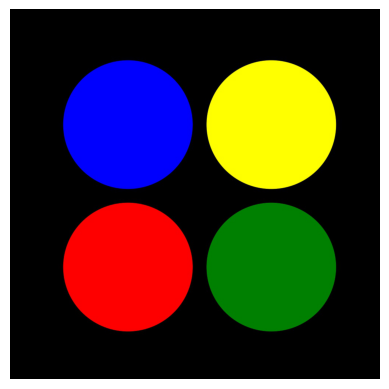

In [22]:
img = plt.imread('four-circles.jpg')
plt.imshow(img)                       
plt.axis('off')                       
plt.show()

In [ ]:
print(f'{type(img)=}', f'{img.shape=}')     # 1000 x 1000 x 3 array (3 obviously for the colour)
print(f'{type(img[0,0,0])=}')               # In the type of image at 0,0,0 (three dimensions), the number is a u int 8
                                            # As 3 dimensional numpy array, first 2 variables are x and y coordinates of pixel, 3rd dimension is the type of RGB 

type(img)=<class 'numpy.ndarray'> img.shape=(1000, 1000, 3)
type(img[0,0,0])=<class 'numpy.uint8'>


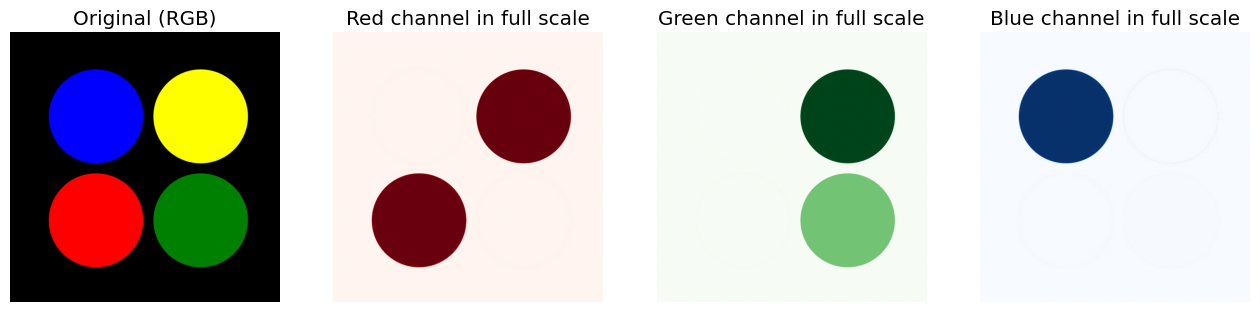

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))   # Creates figure with 4 columns and 1 row, uses subplots and axes
ax_ori, ax_r, ax_g, ax_b = ax                               # Splits 4 columns into 4 objects

ax_ori.imshow(img)
ax_ori.set_title('Original (RGB)')                           # Displays original image

ax_r.imshow(img[:,:,0], cmap= 'Reds')
ax_r.set_title("Red channel in full scale")

ax_g.imshow(img[:,:,1], cmap = 'Greens')
ax_g.set_title("Green channel in full scale")

ax_b.imshow(img[:,:,2], cmap = 'Blues')
ax_b.set_title("Blue channel in full scale")

ax_ori.axis('off') 
ax_r.axis('off') 
ax_g.axis('off')
ax_b.axis('off')
plt.show()

Text(0.5, 1.0, 'Blue values')

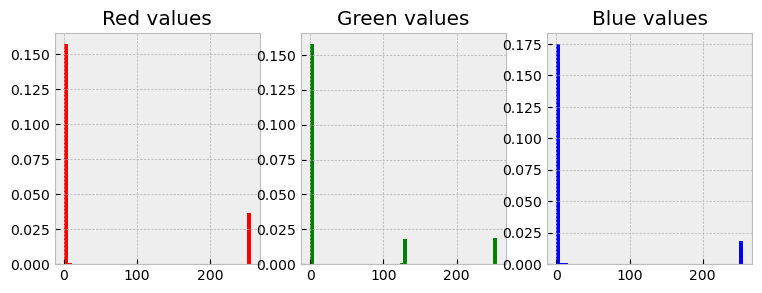

In [ ]:
# Creation of channel histogram

plt.style.use('bmh')

r_data = img[:, :, 0].flatten()
g_data = img[:, :, 1].flatten()
b_data = img[:, :, 2].flatten()                             # Conversion into long 1D list

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
ax_red, ax_green, ax_blue = ax                              # Creates 3 axes

ax_red.hist(r_data, color='red', bins=50, density=True)     # Histogram creation,with 50 bins
ax_red.set_title('Red values')

ax_green.hist(g_data, color='green', bins=50, density=True)
ax_green.set_title('Green values')

ax_blue.hist(b_data, color='blue', bins=50, density=True)
ax_blue.set_title('Blue values')                            # Values at 0 represent most of the Figure
                                                            # Note that yellow is pure red combined with some mid value greens

In [ ]:
n = 10                                              # Number of rows and columns, changing to 10 to see how it works
my_array = np.zeros((3, n, n), dtype='uint8')       # Image organized by layers, then x + y, np.zeros creates empty array

for layer in range(3):
    for i in range(n):
        my_array[layer, i, :] = 2**layer*i
# print(my_array)                                    # For array generation

mask = my_array <= 2
my_array[mask] = 0                                   # Note that mask here is 3 dimensional
mask = my_array >= 12
my_array[mask] = 16                                  # Array filtering, set high to max and lows to min

my_array[1, :, :] = 0                                # Filters out layer 1 (2nd layer) in its entirety

mask = my_array[0, :, :] != 0                        # But here is 2 dimensional 
my_array[0, mask] = 4                                # So setting everything in layer 0 thats not 0 to 4 takes this
mask = my_array[2, :, :] >= 16
my_array[2, mask] = 8                                # Same concept applies here

my_array[1] = my_array[0, :, :]*my_array[2, :, :]   # Sets layer 1 to the product of layer 0 and level 2

mask = (my_array[0] != 0) & (my_array[1] != 0)
my_array[0, mask] = 3
my_array[1, mask] = 3                               # Creates overlap mask, sets all to 3

print(my_array)                                     # Ends up as a blasted wasteland of an array


[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]
  [3 3 3 3 3 3 3 3 3 3]]

 [[0 0 0 0 0 0 0 0 0 0]
  [4 4 4 4 4 4 4 4 4 4]
  [8 8 8 8 8 8 8 8 8 8]
  [8 8 8 8 8 8 8 8 8 8]
  [8 8 8 8 8 8 8 8 8 8]
  [8 8 8 8 8 8 8 8 8 8]
  [8 8 8 8 8 8 8 8 8 8]
  [8 8 8 8 8 8 8 8 8 8]
  [8 8 8 8 8 8 8 8 8 8]
  [8 8 8 8 8 8 8 8 8 8]]]


Text(0.5, 1.0, 'Blue values')

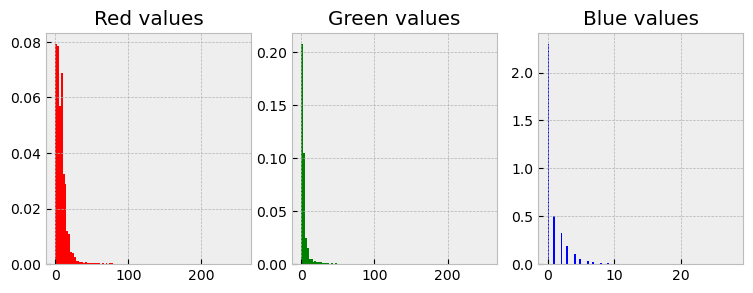

In [ ]:
plt.style.use('bmh')
img = plt.imread('golgi.jpg')

r_data = img[:, :, 0].flatten()
g_data = img[:, :, 1].flatten()
b_data = img[:, :, 2].flatten()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
ax_red, ax_green, ax_blue = ax

ax_red.hist(r_data, color='red', bins=100, density=True)
ax_red.set_title('Red values')

ax_green.hist(g_data, color='green', bins=100, density=True)
ax_green.set_title('Green values')

ax_blue.hist(b_data, color='blue', bins=100, density=True)
ax_blue.set_title('Blue values')

# Results mostly near 0, some truncation useful

In [18]:
img = plt.imread('background.tif')
print(f'{img.shape=}',
      f'{img.min()=}',
      f'{img.max()=}',
      f'{img.mean()=}',
      f'{img.sum()=}',
      sep='\n')                     # Some noise in background despite being black

threshold = 20
img_no_noise = img.copy()                       # Copies img to denoise
img_no_noise[img_no_noise < threshold] = 0      # Denoising operation, sets everything below the threshold to 0
print(f'{img_no_noise.shape=}',
      f'{img_no_noise.min()=}',
      f'{img_no_noise.max()=}',
      f'{img_no_noise.mean()=}',
      f'{img_no_noise.sum()=}',
      sep='\n')

img.shape=(512, 512, 3)
img.min()=np.uint8(0)
img.max()=np.uint8(28)
img.mean()=np.float64(4.996832529703776)
img.sum()=np.uint64(3929669)
img_no_noise.shape=(512, 512, 3)
img_no_noise.min()=np.uint8(0)
img_no_noise.max()=np.uint8(28)
img_no_noise.mean()=np.float64(0.027776082356770832)
img_no_noise.sum()=np.uint64(21844)


c:\Users\Issac\miniconda3\Lib\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


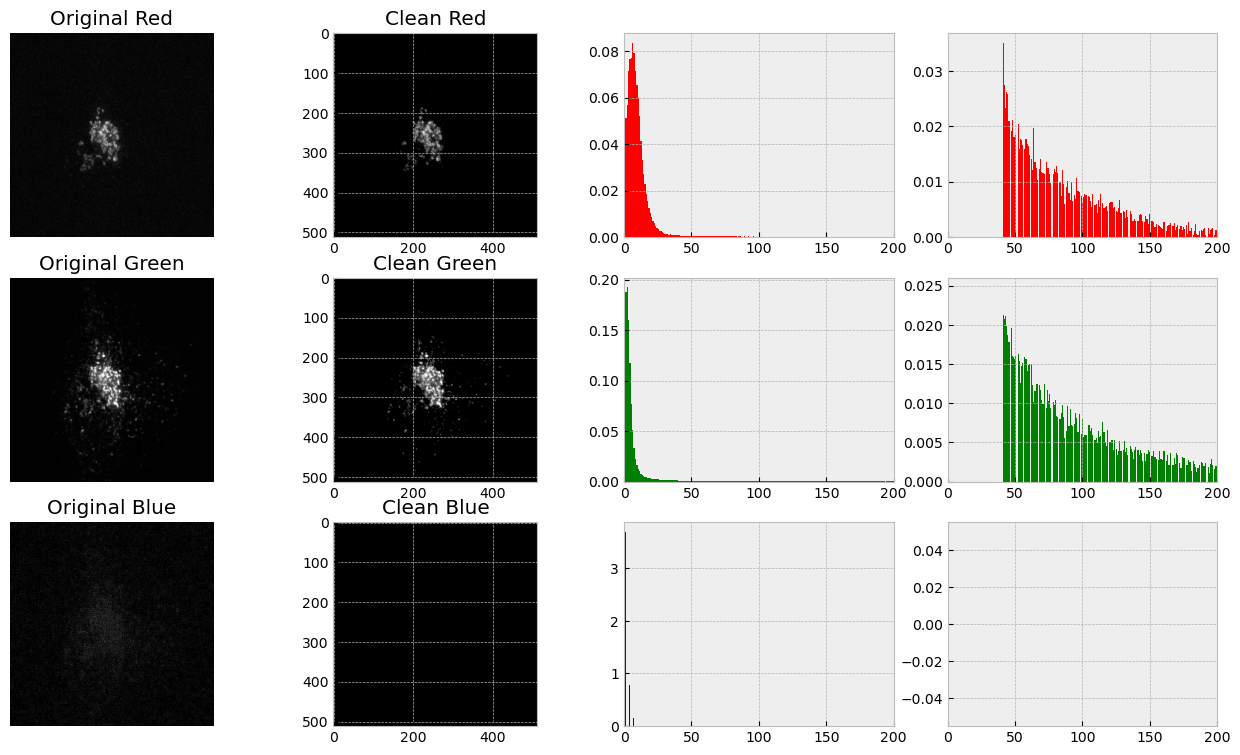

In [6]:
plt.style.use('bmh')
threshold = 40                                          # Set threshold

img = plt.imread('golgi.jpg')
ori_r = img[:, :, 0]
dn_r = ori_r.copy()                             # Looks only at the red channel
ori_g = img[:, :, 1]
dn_g = ori_g.copy()
ori_b = img[:, :, 2]
dn_b = ori_b.copy()
sets = [ori_r, ori_g, ori_b]
dn_sets = [dn_r, dn_g, dn_b]

for i in range(3):
    msk_nse = sets[i] <= threshold                  # Set up mask to denoise the red channel
    (dn_sets[i])[msk_nse] = 0                         # Denoising operation 

fig, ax = plt.subplots(nrows=3, ncols=4,
                       figsize=(16, 9))                 # Sets up figure dimensions

ax_ori_r_i = ax[0,0]
ax_dn_r_i = ax[0,1]
ax_ori_r_h = ax[0,2]
ax_dn_r_h = ax[0,3]

ax_ori_g_i = ax[1,0]
ax_dn_g_i = ax[1,1]
ax_ori_g_h = ax[1,2]
ax_dn_g_h = ax[1,3]

ax_ori_b_i = ax[2,0]
ax_dn_b_i = ax[2,1]
ax_ori_b_h = ax[2,2]
ax_dn_b_h = ax[2,3]

# Images
ax_ori_r_i.imshow(ori_r, cmap = 'gray')
ax_ori_r_i.set_title("Original Red")
ax_dn_r_i.imshow(dn_r, cmap = 'gray')
ax_dn_r_i.set_title("Clean Red")

ax_ori_g_i.imshow(ori_g, cmap = 'gray')
ax_ori_g_i.set_title("Original Green")
ax_dn_g_i.imshow(dn_g, cmap = 'gray')
ax_dn_g_i.set_title("Clean Green")

ax_ori_b_i.imshow(ori_b, cmap = 'gray')
ax_ori_b_i.set_title("Original Blue")
ax_dn_b_i.imshow(dn_b, cmap = 'gray')
ax_dn_b_i.set_title("Clean Blue")

zippo = zip(
    (ax_ori_r_h, ax_dn_r_h, ax_ori_g_h, ax_dn_g_h, ax_ori_b_h, ax_dn_b_h),
    (ori_r, dn_r, ori_g, dn_g, ori_b, dn_b)   # Zipping histograms to their imagages
    )

for axis, data in zippo:
    no_zeros = data.flatten()                           # Flatten data
    no_zeros = no_zeros[no_zeros > 0]                   # Limits data to those greater than 0, (omit the masked)
    if axis == ax_ori_r_h or axis == ax_dn_r_h:
        color = 'red'
    elif axis == ax_ori_g_h or axis == ax_dn_g_h:
        color = 'green'
    else:
        color = 'blue'
       
    axis.hist(no_zeros,
              bins=255,
              color=color,
              density=True)                             # Automates creation of the histograms

    axis.set_xlim([0, 200])                             # Limits axis dimensions

for a in [ax_ori_r_i, ax_ori_g_i, ax_ori_b_i]:
    a.axis('off')

In [ ]:


for a in [ax_ori_image, ax_no_noise_image]:
    a.axis('off')